# Reading Data

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [74]:
data=pd.read_csv('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\train.csv')

print('No of data-points : ',data.shape[0])
data.head(5)


No of data-points :  404290


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


# Distribution of data points among output classes

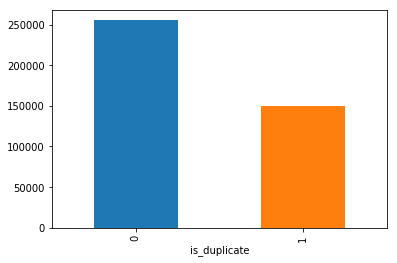

In [75]:
data.groupby('is_duplicate')['id'].count().plot.bar()

The quetions which are duplicates count is less than questions which are not duplicates

In [76]:
print('=>Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(data['is_duplicate'].mean()*100, 2)))
print('\n=> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(data['is_duplicate'].mean()*100, 2)))

=>Question pairs are not Similar (is_duplicate = 0):
   63.08%

=> Question pairs are Similar (is_duplicate = 1):
   36.92%


# Count of unique Questions

In [77]:
qids = pd.Series(data['qid1'].tolist() + data['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



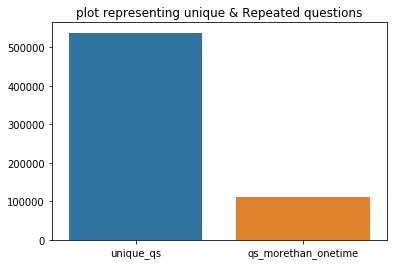

In [78]:
x=['unique_qs','qs_morethan_onetime']
y=[unique_qs,qs_morethan_onetime]
sns.barplot(x,y)
plt.title('plot representing unique & Repeated questions' )
plt.show()

# checking for duplicate rows

In [79]:
dup_pairs=data[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()
print('Total no. of duplicate questions : {}'.format(data.shape[0]-dup_pairs.shape[0]))

Total no. of duplicate questions : 0


# Number of occurences of each question

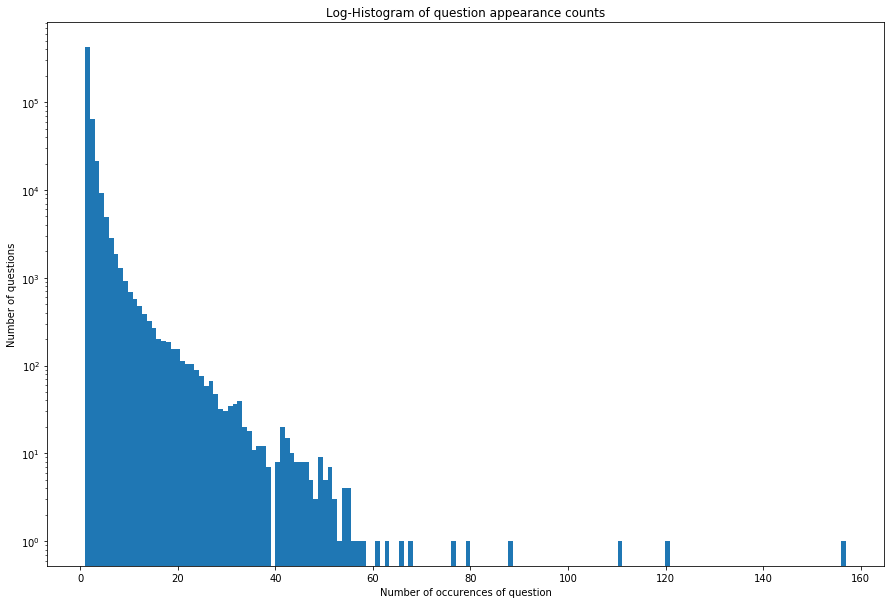

Max no. of times a single question is repeated: 157


In [80]:
plt.figure(figsize=(15, 10))
plt.hist(qids.value_counts(),bins=160)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
plt.show()
print('Max no. of times a single question is repeated: {}'.format(max(qids.value_counts())))

# NAN Check

In [81]:
data[data.isnull().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


there are total 3 rows with null 

1.question1- 1 

2.question2- 2

In [82]:
data=data.fillna('')
print(data.isnull().sum())
data=data.sample(n=100000,random_state=1)
data.to_csv("D:\\datasets\\quora\\quora-question-pairs\\train.csv\\train_data.csv")
data.shape


id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64


(100000, 6)

# Basic Feature Extraction (before cleaning)

Let us now construct a few features like:<br />
    •	freq_qid1 = Frequency of qid1's<br />
    •	freq_qid2 = Frequency of qid2's<br />
    •	q1len = Length of q1<br />
    •	q2len = Length of q2<br />
    •	q1_n_words = Number of words in Question 1<br />
    •	q2_n_words = Number of words in Question 2<br />
    •	word_Common = (Number of common unique words in Question 1 and Question 2)<br />
    •	word_Total =(Total num of words in Question 1 + Total num of words in Question 2)<br />
    •	word_share = (word_common)/(word_Total)<br />
    •	freq_q1+freq_q2 = sum total of frequency of qid1 and qid2<br />
    •	freq_q1-freq_q2 = absolute difference of frequency of qid1 and qid2<br />


In [83]:
import os

if os.path.isfile('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\train_data_new_feat.csv'):
    data = pd.read_csv('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\train_data_new_feat.csv',encoding='latin-1')

else:
    data['freq_qid1'] = data.groupby('qid1')['qid1'].transform('count') 
    data['freq_qid2'] = data.groupby('qid2')['qid2'].transform('count')
    data['q1len'] = data['question1'].str.len() 
    data['q2len'] = data['question2'].str.len()
    data['q1_n_words'] = data['question1'].apply(lambda row: len(row.split(" ")))
    data['q2_n_words'] = data['question2'].apply(lambda row: len(row.split(" ")))

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" "))) 
        return 1.0 * len(w1 & w2)
    
    data['word_Common'] = data.apply(normalized_word_Common,axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" "))) 
        return 1.0 * (len(w1) + len(w2))
    
    data['word_Total'] = data.apply(normalized_word_Total,axis=1)

    def normalized_word_Share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" "))) 
        return 1.0 * ((len(w1 & w2))/((len(w1) + len(w2))))
                      
    data['word_share'] = data.apply(normalized_word_Share,axis=1)
                      
    data['freq_q1+freq_q2'] = data['freq_qid1']+data['freq_qid2']
    data['freq_q1-freq_q2'] =abs(data['freq_qid1']-data['freq_qid2'])
    
    #data.head(5)

    data.to_csv('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\train_data_new_feat.csv')

data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+freq_q2,freq_q1-freq_q2
237030,237030,33086,348102,How can I stop playing video games?,Should I stop playing video games with my child?,0,1,1,35,48,7,9,4.0,16.0,0.250000,2,0
247341,247341,73272,8624,Who is better Donald Trump or Hillary Clinton?,Why is Hillary Clinton a better choice than Do...,1,6,3,46,57,8,10,4.0,18.0,0.222222,9,3
246425,246425,359482,359483,What do you think is the chance that sometime ...,Do you think there will be another world war/n...,1,1,1,139,77,28,14,12.0,39.0,0.307692,2,0
306985,306985,1357,47020,Why are so many questions posted to Quora that...,Why do people write questions on Quora that co...,1,6,7,86,86,16,16,5.0,30.0,0.166667,13,1
225863,225863,334315,334316,Can there even be a movie ever rated 10/10 on ...,What are your 10/10 movies?,0,1,1,51,27,11,5,1.0,16.0,0.062500,2,0


# Analysis on Extracted Features

In [84]:
print ("Minimum length of the questions in question1 : " , min(data['q1_n_words'])) # o/p =1
print ("Minimum length of the questions in question2 : " , min(data['q2_n_words'])) # o/p =1
print ("Number of Questions with minimum length [question1] : ", data[data['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] : ", data[data['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] :  19
Number of Questions with minimum length [question2] :  4


# Feature : word_share

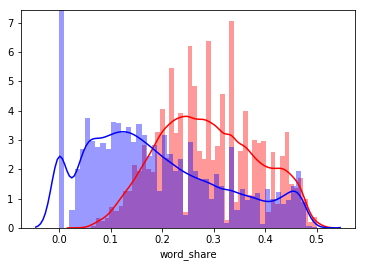

In [85]:
sns.distplot(data[data['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

There is overlap on word_share for similar(1) and dissimlar questions(0)

# Feature : word_Common

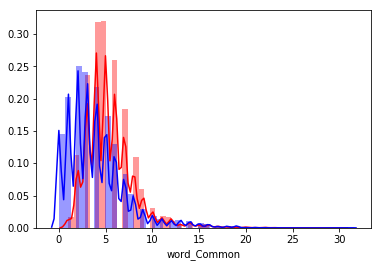

In [86]:
sns.distplot(data[data['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'blue' )
plt.show()


There is overlap on word_Common for similar(1) and dissimlar questions(0)

# PreProcessing Text

Preprocessing:<br/>
    1.Removing html tags<br/>
    2.Removing Punctuations<br/>
    3.Performing stemming<br/>
    4.Removing Stopwords<br/>
    5.Expanding contractions etc.

In [87]:
import nltk
from nltk.corpus import stopwords
#python -m nltk.downloader stopwords ---in command promt

In [88]:
STOP_WORDS = stopwords.words("english")

In [115]:
import re
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
SAFE_DIV = 0.0001
def preprocess(x):
    
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x) #This matches any non-alphanumeric character [^a-zA-Z0-9]
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
    return x

# Advanced Feature Extraction (NLP and Fuzzy Features)

Definition:<br/>

Token: You get a token by splitting sentence a space<br/>
Stop_Word : stop words as per NLTK.<br/>
Word : A token that is not a stop_word<br/>
Features:<br/>
<br/>
cwc_min : Ratio of common_word_count to min lenghth of word count of Q1 and Q2<br/>
cwc_min = common_word_count / (min(len(q1_words), len(q2_words))<br/>
<br/>
cwc_max : Ratio of common_word_count to max lenghth of word count of Q1 and Q2<br/>
cwc_max = common_word_count / (max(len(q1_words), len(q2_words))<br/><br/>

csc_min : Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2<br/>
csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))<br/><br/>

csc_max : Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br/>
csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))<br/><br/>

ctc_min : Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br/>
ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))<br/><br/>


ctc_max : Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br/>
ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))<br/><br/>


last_word_eq : Check if First word of both questions is equal or not<br/>
last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])<br/><br/>


first_word_eq : Check if First word of both questions is equal or not<br/>
first_word_eq = int(q1_tokens[0] == q2_tokens[0])<br/><br/>


abs_len_diff : Abs. length difference<br/>
abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))<br/><br/>


mean_len : Average Token Length of both Questions<br/>
mean_len = (len(q1_tokens) + len(q2_tokens))/2<br/><br/>


fuzz_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/<br/>


fuzz_partial_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/<br/>


token_sort_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/<br/>

token_set_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/<br/><br/>

longest_substr_ratio : Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br/>
longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))<br/>

In [117]:

import distance
def get_token_features(que1,que2):
    token_features=[0.0]*10
    
    q1_tokens=que1.split()
    q2_tokens=que2.split()
  
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
     return token_features
    
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features
        
#print(data[data['question2'].isnull()])   
# get the Longest Common sub string

def get_longest_substr_ratio(que1, que2):
    strs = list(distance.lcsubstrings(que1, que2))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(que1), len(que2)) + 1)

In [118]:
from fuzzywuzzy import fuzz

def extract_features(data):
    # preprocessing each question
    data['question1'] = data['question1'].fillna("").apply(preprocess)
    data['question2'] = data['question2'].fillna("").apply(preprocess)
    
    print('token features...')
    
    token_features = data.apply(lambda x: get_token_features(x['question1'], x['question2']), axis=1)
    
    data['cwc_min']       = list(map(lambda x: x[0], token_features))
    data['cwc_max']       = list(map(lambda x: x[1], token_features))
    data['csc_min']       = list(map(lambda x: x[2], token_features))
    data['csc_max']       = list(map(lambda x: x[3], token_features))
    data['ctc_min']       = list(map(lambda x: x[4], token_features))
    data['ctc_max']       = list(map(lambda x: x[5], token_features))
    data['last_word_eq']  = list(map(lambda x: x[6], token_features))
    data['first_word_eq'] = list(map(lambda x: x[7], token_features))
    data['abs_len_diff']  = list(map(lambda x: x[8], token_features))
    data['mean_len']      = list(map(lambda x: x[9], token_features))
    
    print('fuzzy features..')

    data['token_set_ratio']       = data.apply(lambda x: fuzz.token_set_ratio(x['question1'], x['question2']), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    data['token_sort_ratio']      = data.apply(lambda x: fuzz.token_sort_ratio(x['question1'], x['question2']), axis=1)
    data['fuzz_ratio']            = data.apply(lambda x: fuzz.QRatio(x['question1'], x['question2']), axis=1)
    data['fuzz_partial_ratio']    = data.apply(lambda x: fuzz.partial_ratio(x['question1'], x['question2']), axis=1)
          
    data['longest_substr_ratio']  = data.apply(lambda x: get_longest_substr_ratio(x['question1'],x['question2']),axis=1)
          
    return data

In [129]:

if os.path.isfile('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\nlp_features_train_data.csv'):
    data = pd.read_csv('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\nlp_features_train_data.csv',encoding='latin-1')
    data.fillna('')
else:
    print('Extracting features for train_data:')
    df_temp = pd.read_csv('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\train_data.csv')
    data = extract_features(df_temp)
    data.to_csv('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\nlp_features_train_data.csv', index=False)
data.head(8)

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,237030,237030,33086,348102,how can i stop playing video games,should i stop playing video games with my child,0,0.999975,0.799984,0.333322,...,0.555549,0.0,0.0,2.0,8.0,87,69,72,86,0.777778
1,247341,247341,73272,8624,who is better donald trump or hillary clinton,why is hillary clinton a better choice than do...,1,0.999980,0.833319,0.333322,...,0.599994,0.0,0.0,2.0,9.0,92,83,42,50,0.361702
2,246425,246425,359482,359483,what do you think is the chance that sometime ...,do you think there will be another world war n...,1,0.857131,0.499996,0.999986,...,0.464284,0.0,0.0,13.0,21.5,94,70,46,56,0.294872
3,306985,306985,1357,47020,why are so many questions posted to quora that...,why do people write questions on quora that co...,1,0.374995,0.333330,0.333328,...,0.312498,0.0,1.0,0.0,16.0,59,51,53,52,0.137931
4,225863,225863,334315,334316,can there even be a movie ever rated 10 10 on ...,what are your 10 10 movies,0,0.499975,0.166664,0.000000,...,0.083333,0.0,0.0,6.0,9.0,46,50,42,48,0.250000
5,259303,259303,6304,375056,which is correct each of you is or each of ...,what is the difference between leafs and leave...,0,0.999900,0.166664,0.285710,...,0.187499,0.0,0.0,4.0,14.0,60,52,32,48,0.163636
6,224788,224788,94113,46020,will you marry a girl who is not virgin,would you marry a non virgin woman,1,0.666644,0.399992,0.999950,...,0.444440,0.0,0.0,2.0,8.0,74,74,66,63,0.361111
7,393492,393492,71478,374655,what is a good torrent download site,what are the best sites for torrent download,0,0.499988,0.499988,0.333322,...,0.374995,0.0,1.0,1.0,7.5,75,75,65,73,0.473684


Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate, freq_qid1, freq_qid2, q1len, q2len, q1_n_words, q2_n_words, word_Common, word_Total, word_share, freq_q1+freq_q2, freq_q1-freq_q2]
Index: []


In [128]:
from os import path
d = path.dirname('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\')
print(d)

D:\datasets\quora\quora-question-pairs\train.csv
